At the learning rate  0.0005  it did not optimize onto the graph.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0

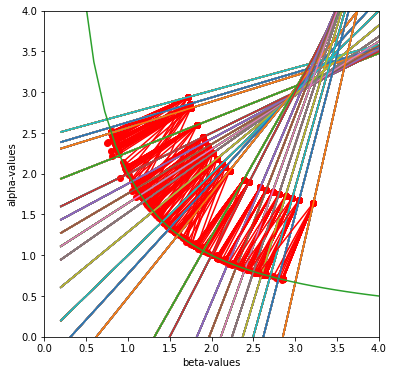

x-values:  [0.75       0.78       0.8        0.9        1.         1.05
 1.1        1.15       1.2        1.3        1.41421356 1.5
 1.6        1.9        2.         2.2        2.3        2.4
 2.5        2.6        2.7        2.8        3.        ]
learning rates:  [0.0005 0.001  0.002  0.003  0.004  0.005  0.007  0.009  0.01   0.011
 0.012  0.015  0.016  0.019  0.02   0.021  0.023  0.025  0.027  0.03
 0.032  0.035  0.037  0.04   0.045  0.05   0.07   0.09   0.1    0.11
 0.12   0.14   0.15   0.16   0.17   0.19   0.2    0.22   0.3   ]


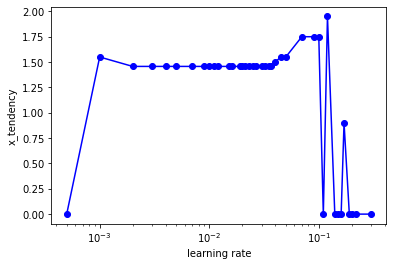

In [11]:
import matplotlib.pyplot as plt
#generating random data from a linear function and adding noise
#generate x-values uniformly inside the interval [0,1]
import numpy as np
X_data = np.random.uniform(0, 1, 1000)

#generate noise with normal distribution
noise = np.random.normal(0, 0.1, X_data.size)

#generate values of the linear function: f(x) = alpha_prime * x
#and add the noise
alpha_prime = 2
y_data = alpha_prime * X_data + noise


#build the model
#import the necessary functions from the tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

#introduce the learning model: one hidden layer and one hidden node
model = Sequential()
model.add(Dense(1, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(1, activation='linear', use_bias=True))

#generate some points which lie on the graph alpha_prime/x (base points)
#the x_values correspond to the beta-values of such points
#x_values = np.concatenate((np.linspace(0.7,np.sqrt(2),12),np.linspace(np.sqrt(2),3,8)))
x_values = np.array([0.75,0.78, 0.8, 0.9, 1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.41421356237,\
                     1.5, 1.6,1.9, 2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 3])

#compute the corresponding alpha_values
y_values = alpha_prime/x_values

#distance (along the gradient line) from points on the graph
d=1

#generating the new points; wich will give us the initial values of the weights
#for a given point (x_base,2/x_base) we calculate the value (at the x-value x) of the perpendicular line on the 
#graph alpha_prime/x which goes through the point (x_base,2/x_base)

#function of the gradient line at the position x_base
def perpendicular(x_base,x):
    return x_base**2 /alpha_prime * x + alpha_prime/x_base - x_base**3 /alpha_prime

#calculate the x-value of the point which is a distance of d away from a base point on alpha_prime/x and which lies
#on the perpendicular line to this base point

#computes the x_value of the point which is distance d aways from x_base.. 
#..on the graph along the gradient line
def x_distance(d, x_base):
    return x_base + np.sqrt(d**2 * 1/(1+(x_base**4 / alpha_prime**2)))


#compute the initial weights (beta,alpha)
x_weight = x_distance(d, x_values) #betas
y_weight = perpendicular(x_values, x_weight) #corresponding alphas


#make plot larger so see small chnges better
plt.figure(figsize=(6,6))
#plt.axis('equal')
plt.ylim((0,4))
plt.xlim((0,4))
plt.xlabel('beta-values')
plt.ylabel('alpha-values')


#for all initial weights (alpha,beta) optimize the model and plot where the points are sent
l = len(x_values)

#defining the bool vector which will allow us to store the tendency point pattern.
#we will set bool_opt[i]=0, if the i-th point optimizes left of its initial gradient line
#and bool_opt[i]=1, if the i-th point converges right of its initial gradient line and
#bool_opt[i]=2, if the i-th point converges very close to its initial gradient line
bool_opt = np.zeros(l)


#learning rates for which we want to find the tendency point
#note that we want to plot more smaller learning rates
#learning_rates = np.concatenate((np.linspace(0.001,0.07,16),np.linspace(0.07,1.15,8)))
learning_rates = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.007, 0.009, 0.01, 0.011, \
                           0.012, 0.015, 0.016, 0.019, 0.02,\
                           0.021, 0.023, 0.025, 0.027, 0.03, 0.032, 0.035, 0.037, 0.04,\
                           0.045, 0.05, 0.07, 0.09, 0.1, 0.11, 0.12, 0.14, 0.15, 0.16,\
                           0.17, 0.19, 0.2, 0.22, 0.3])

#here we will store the x-values of the computed tendency points
x_tendency = np.zeros(len(learning_rates))

#iterate through all learning rates
for t in range(len(learning_rates)):
    
    #reset the boolean vector to store the tendency point pattern
    #we will set bool_opt[i]=0, if the i-th point optimizes left of its initial gradient line
    #and bool_opt[i]=1, if the i-th point converges right of its initial gradient line and
    #bool_opt[i]=2, if the i-th point converges very close to its initial gradient line
    bool_opt = np.zeros(l)
    
    #iterate through the x-values
    for i in range(l):
        beta_init = x_weight[i] #beta corresponds to x
        alpha_init = y_weight[i]  #alpha corresponds to y
        b_init = 0
        h_init = 0

        model.set_weights([np.array([[beta_init]]), np.array([b_init]), np.array([[alpha_init]]), np.array([h_init])])

        #compile the keras model
        #set some custom learning rate:
        l_rate= learning_rates[t]

        #set optimization parameters
        opt = keras.optimizers.SGD(learning_rate=l_rate)
        model.compile(loss='mean_squared_error', optimizer=opt)

        #fit the keras model on the dataset
        #verbose = 0, stops the algorithm from printing the progress after every epoch
        model.fit(X_data, y_data, epochs=150, batch_size=20, verbose = 0)

        #get the weights of the NN
        [[[beta]], [b], [[alpha]], [h]] = model.get_weights()
        
        #stop the plotting if the optimized point does not lie on the graph alpha_real/x
        if abs(alpha*beta - 2) > 0.3:
            print('At the learning rate ',learning_rates[t], ' it did not optimize onto the graph.')
            bool_opt = np.zeros(l)
            break
        

        #plot point before and after optimization (and connect these points)
        plt.plot([beta_init, beta], [alpha_init,alpha], 'ro-')

        #plot the gradient line on which the initial values lie
        x = np.linspace(0.2,4,30)
        y_perpline = perpendicular(x_values[i],x)
        plt.plot(x, y_perpline)

        #check the initial weights optimized to the right of,  to the left of or exactly onto their gradient line
        if abs(beta-x_values[i]) <= 0.001:
                bool_opt[i] = 2
        else: 
            if beta > x_values[i] : #so if the optimized point lies left of the gradient line
                bool_opt[i] = 1
            else:
                bool_opt[i] = 0

    #find out the approximate value of the tendency point
    #x_tendency stays zero, if the vector does not have a desired form
    
    
    #we print this to get an update of the progress while compiling.
    #note that the compilation on my computer takes around 25 minutes.
    print(bool_opt)
    print(t)
    
    
    for k in range(l-1):
        if bool_opt[k] == 2:
            x_tendency[t] = x_values[k]
            break
        if (bool_opt[k]) == 1.0 and (bool_opt[k+1]) == 0.0:
            x_tendency[t] = (x_values[k] + x_values[k+1])/2
            break
    if bool_opt[l-1] == 2:
        x_tendency[t] == x_values[l-1]



    


#plot the graph alpha_prime/x
x = np.linspace(0.2,4,30)
y = alpha_prime/x
plt.plot(x,y)
plt.show()



#plot the learning rate vlaus on a log scale (so see the small values more precisely)
plt.xscale('log')

plt.xlabel('learning rate')
plt.ylabel('x_tendency')

plt.plot(learning_rates, x_tendency, 'bo-')

print('x-values: ', x_values)
print('learning rates: ', learning_rates)